<a href="https://colab.research.google.com/github/Sofiiasmm/-_-/blob/main/%D0%9B%D0%B0%D0%B15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЗАВДАННЯ 1: Iris

Перші 5 рядків Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


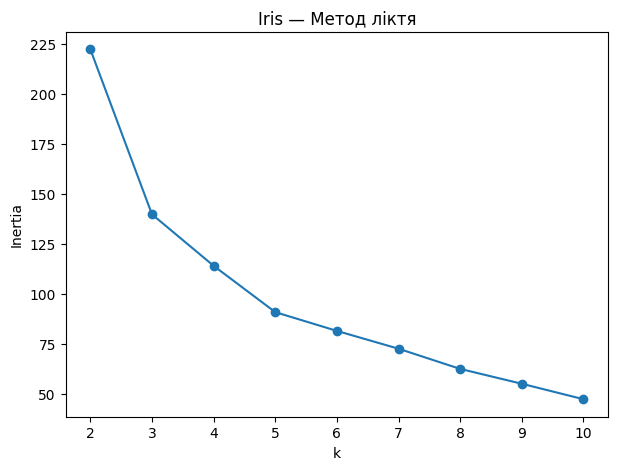

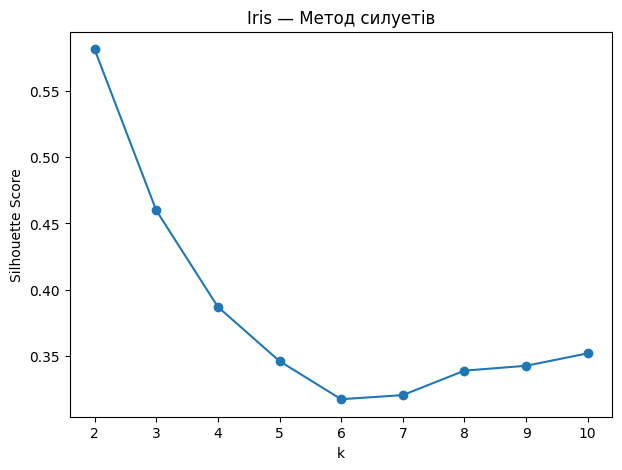

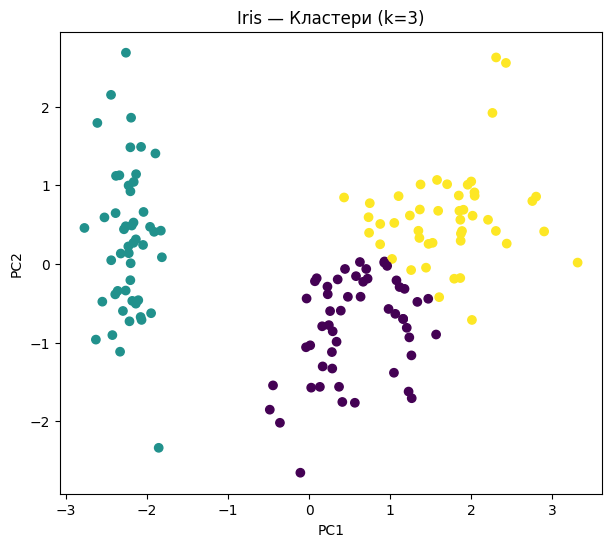


Висновок:
Метод ліктя та метод силуетів показують оптимальну кількість кластерів k = 3.


 ЗАВДАННЯ 2: Аналіз іншого датасету (Wine)

Перші 5 рядків Wine:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             

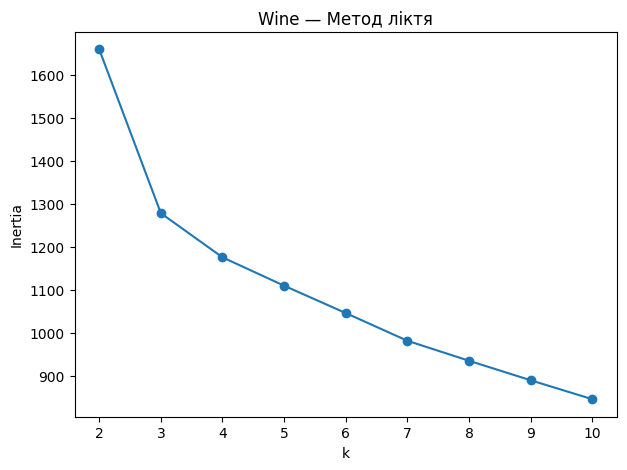

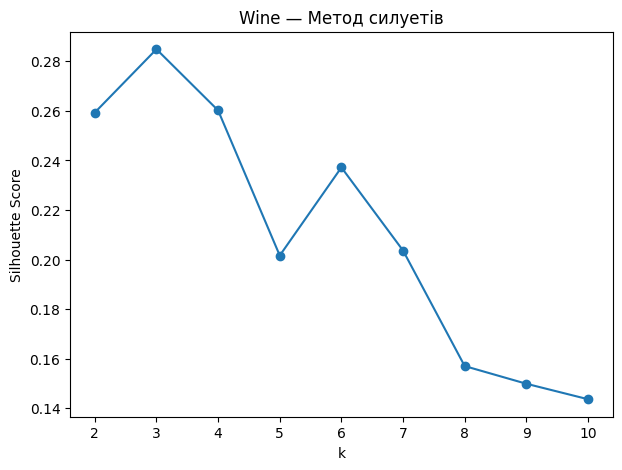

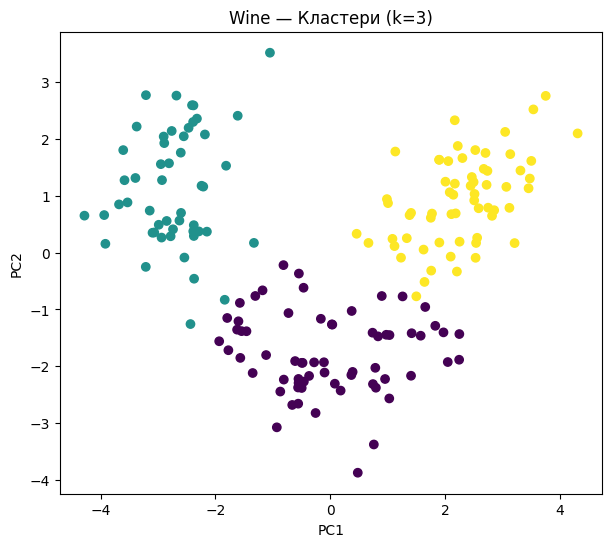


Висновок:
Метод ліктя та метод силуетів для Wine також показують оптимальне k ≈ 3.
Кластери добре відокремлені в PCA-просторі.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
print("ЗАВДАННЯ 1: Iris")

# Завантаження датасету Iris
iris = datasets.load_iris(as_frame=True)
df_iris = iris.frame
print("\nПерші 5 рядків Iris:")
print(df_iris.head())

# Масштабування
X = df_iris.iloc[:, :-1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод ліктя
inertias = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertias, marker='o')
plt.title("Iris — Метод ліктя")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# Метод силуетів
silhouette_scores = []
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(7,5))
plt.plot(K, silhouette_scores, marker='o')
plt.title("Iris — Метод силуетів")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

# Оптимально: k = 3
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Візуалізація кластера PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_2D[:,0], X_2D[:,1], c=labels)
plt.title(f"Iris — Кластери (k={k_opt})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("\nВисновок:")
print("Метод ліктя та метод силуетів показують оптимальну кількість кластерів k = 3.")



#ЗАВДАННЯ 2


print("\n\n ЗАВДАННЯ 2: Аналіз іншого датасету (Wine)")

# Завантажимо інший датасет — Wine
wine = datasets.load_wine(as_frame=True)
df = wine.frame.copy()

print("\nПерші 5 рядків Wine:")
print(df.head())

# Розмір
print("\nРозмір датасету:", df.shape)

# Типи даних
print("\nТипи даних:")
print(df.dtypes)

# Пропущені значення
print("\nПропущені значення до обробки:")
print(df.isna().sum())

df = df.fillna(df.mean(numeric_only=True))

print("\nПропущені значення після обробки:")
print(df.isna().sum())

# Дублікати
duplicates = df.duplicated().sum()
print("\nКількість дублікатів:", duplicates)

df = df.drop_duplicates()

# Описова статистика
print("\nОписова статистика:")
print(df.describe())

# Визначення типу задачі
target_unique = df["target"].nunique()
task_type = "класифікація" if target_unique > 1 else "регресія"
print(f"\nТип задачі: {task_type}")



#  Моделювання (3 моделі) + оцінка


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns="target").values
y = df["target"].values

# Масштабування
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Модель 1: Logistic Regression
lr = LogisticRegression(max_iter=2000)
params_lr = {"C": [0.01, 0.1, 1, 10]}
gs_lr = GridSearchCV(lr, params_lr, cv=5)
gs_lr.fit(X_train, y_train)

# Модель 2: Random Forest
rf = RandomForestClassifier(random_state=42)
params_rf = {"n_estimators": [50, 100, 200]}
gs_rf = GridSearchCV(rf, params_rf, cv=5)
gs_rf.fit(X_train, y_train)

# Модель 3: KNN
knn = KNeighborsClassifier()
params_knn = {"n_neighbors": [3, 5, 7]}
gs_knn = GridSearchCV(knn, params_knn, cv=5)
gs_knn.fit(X_train, y_train)

# Оцінка моделей
models = {
    "Logistic Regression": gs_lr,
    "Random Forest": gs_rf,
    "KNN": gs_knn
}

print("\n\n=== РЕЗУЛЬТАТИ МОДЕЛЕЙ ===")
for name, model in models.items():
    pred = model.predict(X_test)
    print(f"\nМодель: {name}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))



#  Кластеризація Wine (Elbow + Silhouette)

print("\n=== Кластеризація Wine ===")

inertias = []
silhouette_scores = []

K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Elbow
plt.figure(figsize=(7,5))
plt.plot(K, inertias, marker='o')
plt.title("Wine — Метод ліктя")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# Silhouette
plt.figure(figsize=(7,5))
plt.plot(K, silhouette_scores, marker='o')
plt.title("Wine — Метод силуетів")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

# Візуалізація PCA
k_opt_wine = 3
kmeans_wine = KMeans(n_clusters=k_opt_wine, random_state=42, n_init=10)
labels_wine = kmeans_wine.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_2D_wine = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_2D_wine[:,0], X_2D_wine[:,1], c=labels_wine)
plt.title(f"Wine — Кластери (k={k_opt_wine})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("\nВисновок:")
print("Метод ліктя та метод силуетів для Wine також показують оптимальне k ≈ 3.")
print("Кластери добре відокремлені в PCA-просторі.")